# Introduction to Graph Neural Networks

This notebook introduces Graph Neural Networks (GNNs) based on the seminal paper "The Graph Neural Network Model" by Scarselli et al. We'll explore the fundamental concepts, motivation, and applications of GNNs as an extension of neural networks for processing graph-structured data.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch

# Import local utilities
import sys
sys.path.append('..')
from utils.visualization import visualize_graph
from utils.graph_utils import GNNGraph, create_random_graph

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

## 1. What are Graph Neural Networks?

### 1.1 From Neural Networks to Graph Neural Networks

Neural networks have revolutionized machine learning by providing powerful models for processing various types of data, such as:

- **Feedforward Neural Networks**: Process fixed-size vectors
- **Convolutional Neural Networks (CNNs)**: Process grid-structured data (images)
- **Recurrent Neural Networks (RNNs)**: Process sequential data

However, many real-world problems involve data that can be naturally represented as **graphs** - structures consisting of nodes (vertices) connected by edges.

**Graph Neural Networks (GNNs)** extend the neural network paradigm to process graph-structured data directly, enabling learning on domains where relationships between entities are critical.

### 1.2 Why We Need Graph Neural Networks

Traditional neural networks face several challenges when dealing with graph data:

1. **Variable Size**: Graphs can have different numbers of nodes and edges
2. **No Natural Ordering**: Unlike sequences, graphs have no natural order among nodes
3. **Complex Topological Structure**: Relationships between nodes create complex dependencies
4. **Heterogeneous Information**: Nodes and edges can have different types and features

GNNs address these challenges by defining neural network operations directly on the graph structure, allowing the model to:

- Process graphs of arbitrary size and structure
- Capture dependencies between connected nodes
- Learn representations that are invariant to node ordering
- Incorporate both node and edge features

### 1.3 Basic Idea of Graph Neural Networks

The core idea behind GNNs as introduced by Scarselli et al. is:

1. Associate each node with a **state vector** (or embedding) that encodes information about the node and its neighborhood
2. Update these state vectors iteratively through **message passing** between connected nodes
3. Achieve a **stable equilibrium** where state vectors contain rich representations of each node's context
4. Use these state vectors to make predictions about nodes, edges, or entire graphs

Let's visualize a simple graph to understand the concept better:

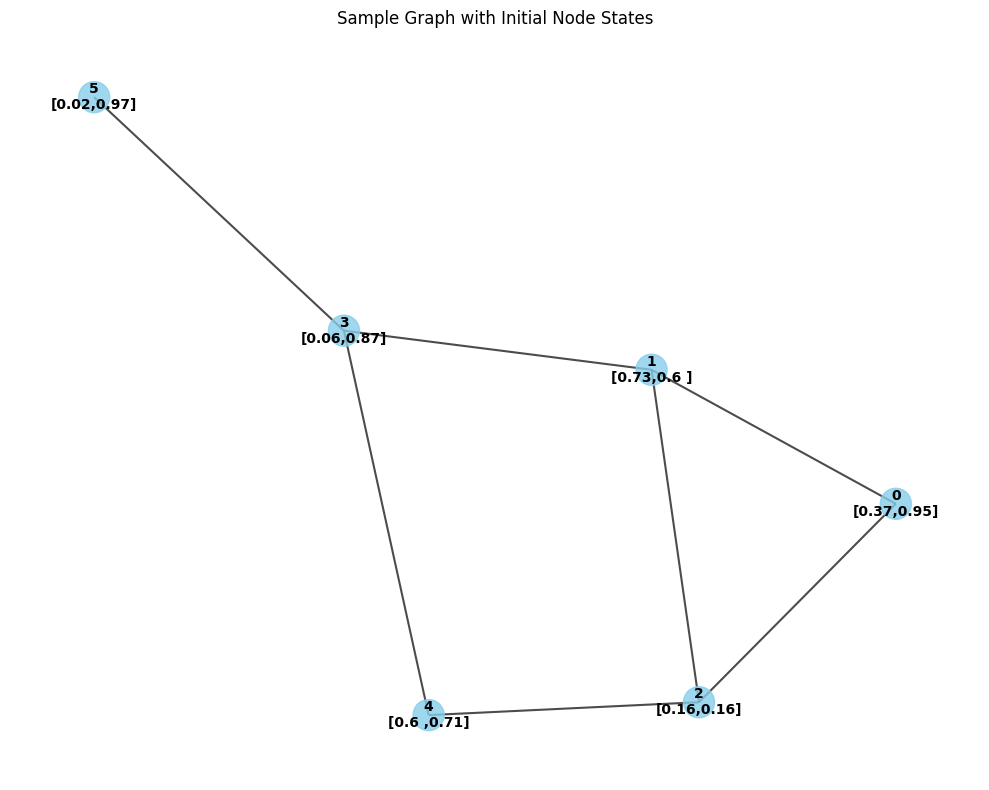

In [2]:
# Create a simple graph for visualization
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5)])

# Define initial state vectors for each node (random 2D vectors)
node_states = {node: np.random.rand(2) for node in G.nodes()}

# Visualize the graph with state vectors
visualize_graph(G, node_states=node_states, title="Sample Graph with Initial Node States")

### 1.4 Key Components of the GNN Model

According to Scarselli et al., the GNN model consists of several key components:

1. **Local Transition Function (f)**: Updates each node's state based on its features, neighbors' states, and edge features
2. **Local Output Function (g)**: Produces the final output for each node based on its state
3. **Global Readout Function**: Aggregates node states to produce graph-level outputs (used for graph classification)
4. **Iterative Diffusion Process**: Repeatedly applies the transition function until convergence
5. **Learning Algorithm**: Updates the parameters of functions f and g using gradient-based optimization

The local transition function is crucial as it defines how information propagates through the graph:

$$h_v^{(t)} = f_W(x_v, x_{co[v]}, h_{ne[v]}^{(t-1)}, x_{ne[v]})$$

Where:
- $h_v^{(t)}$ is the state of node $v$ at iteration $t$
- $x_v$ is the feature vector of node $v$
- $x_{co[v]}$ represents features of edges connected to $v$
- $h_{ne[v]}^{(t-1)}$ are the states of neighboring nodes from the previous iteration
- $x_{ne[v]}$ are the features of neighboring nodes
- $f_W$ is a parameterized function (typically a neural network)

## 2. Key Applications of Graph Neural Networks

Scarselli et al. highlighted several important applications for GNNs:

### 2.1 Chemical Compounds Analysis

Molecules can be naturally represented as graphs:
- Nodes = atoms
- Edges = chemical bonds
- Node features = atomic properties
- Edge features = bond types

GNNs can be used for:
- Predicting molecular properties
- Identifying substructures (functional groups)
- Drug discovery and design

Let's create a simple visualization of a molecule as a graph:

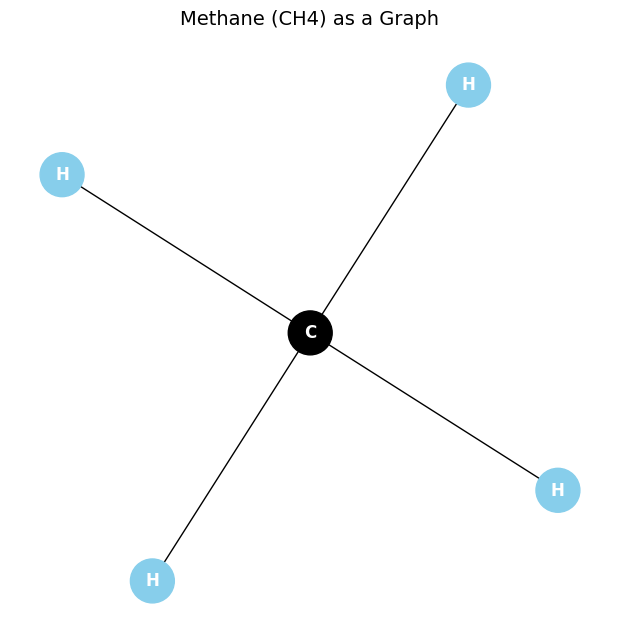

In [3]:
# Create a simple molecule graph (methane - CH4)
molecule = nx.Graph()
# Carbon atom at the center (node 0)
# Hydrogen atoms (nodes 1-4)
molecule.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4)])

# Add node labels (atom types)
node_labels = {0: 'C', 1: 'H', 2: 'H', 3: 'H', 4: 'H'}
nx.set_node_attributes(molecule, node_labels, 'element')

# Different colors for different elements
node_colors = ['black' if molecule.nodes[n]['element'] == 'C' else 'skyblue' 
               for n in molecule.nodes]

# Visualize the molecule
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(molecule, seed=42)
nx.draw(molecule, pos, node_color=node_colors, with_labels=True, labels=node_labels, 
        node_size=1000, font_color='white', font_weight='bold')
plt.title("Methane (CH4) as a Graph", fontsize=14)
plt.show()

### 2.2 Web Page Ranking

The web can be represented as a directed graph:
- Nodes = web pages
- Edges = hyperlinks
- Node features = page content
- Edge features = anchor text

GNNs can be used for:
- Ranking pages (similar to PageRank)
- Classifying web pages
- Detecting communities

Let's simulate a small web graph:

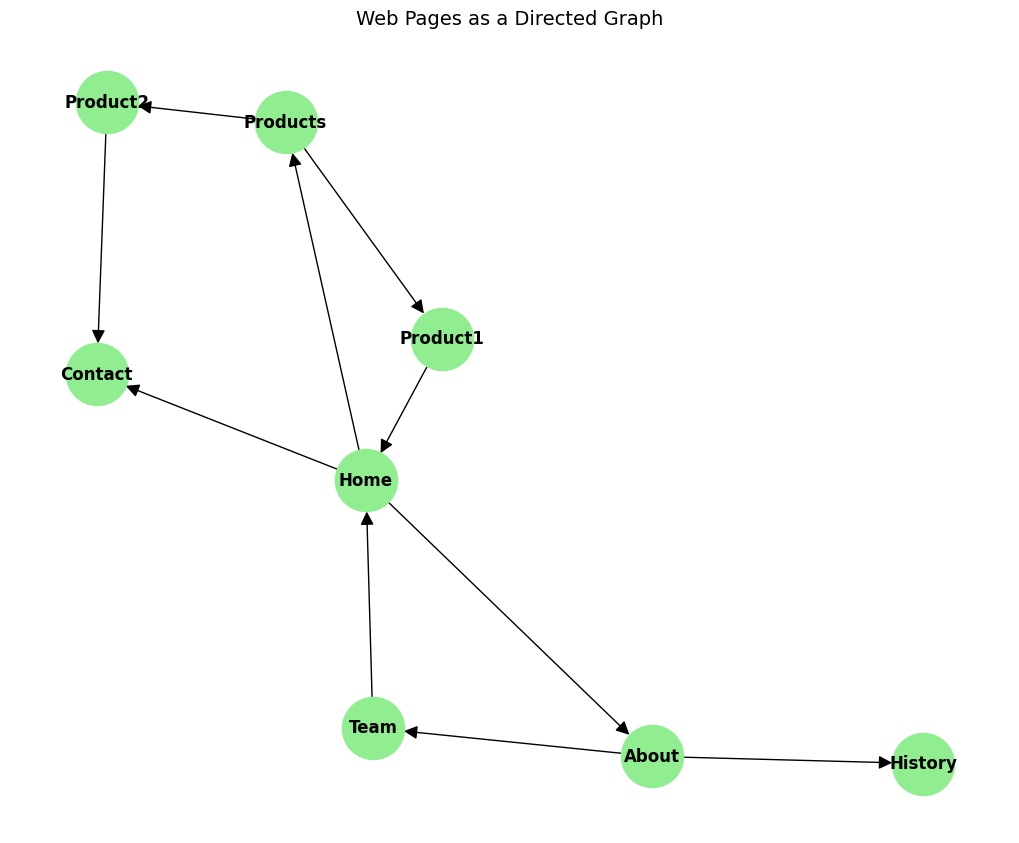

In [4]:
# Create a directed graph representing web pages
web = nx.DiGraph()
web.add_edges_from([
    ('Home', 'Products'), ('Home', 'About'), ('Home', 'Contact'),
    ('Products', 'Product1'), ('Products', 'Product2'),
    ('About', 'Team'), ('About', 'History'),
    ('Team', 'Home'), ('Product1', 'Home'), ('Product2', 'Contact')
])

# Visualize the web graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(web, seed=42)
nx.draw(web, pos, with_labels=True, node_color='lightgreen', 
        node_size=2000, arrowsize=20, font_weight='bold')
plt.title("Web Pages as a Directed Graph", fontsize=14)
plt.show()

### 2.3 Image Analysis

Images can be processed as graphs where:
- Nodes = superpixels or regions
- Edges = adjacency between regions
- Node features = visual descriptors (color, texture)
- Edge features = boundary properties

GNNs can be used for:
- Object recognition
- Scene understanding
- Image segmentation

This approach differs from CNNs by focusing on relational properties rather than grid structure.

### 2.4 Other Applications

Since Scarselli's paper, GNNs have been applied to many more domains:

- **Social Networks**: Friend recommendation, community detection, influence prediction
- **Knowledge Graphs**: Reasoning, link prediction, entity classification
- **Recommender Systems**: Using user-item interaction graphs
- **Transportation Networks**: Traffic prediction, route optimization
- **Protein Structures**: Function prediction, drug interaction
- **Code Analysis**: Vulnerability detection, program synthesis

## 3. GNNs vs. Traditional Neural Networks

Let's compare GNNs with traditional neural network architectures:

| Aspect | Traditional Neural Networks | Graph Neural Networks |
|--------|----------------------------|-------------------------|
| **Input Structure** | Fixed-size vectors, grids, or sequences | Arbitrary graph structures |
| **Invariance** | CNNs: translation invariance | Permutation invariance to node ordering |
| **Context Modeling** | Local (CNN) or sequential (RNN) | Relational (neighborhood-based) |
| **Parameter Sharing** | Across spatial dimensions | Across graph topology |
| **Computational Paradigm** | Feed-forward or recurrent | Message passing until convergence |
| **Inductive Bias** | Grid structure (CNN), Sequential (RNN) | Graph connectivity |

## 4. The Core GNN Learning Challenge

According to Scarselli et al., the key challenge in GNNs is finding a way to encode graph structure into a neural network model that:

1. Can handle variable sized inputs (different graphs have different numbers of nodes and edges)
2. Is invariant to permutations of nodes (same graph with reordered nodes should produce the same output)
3. Can propagate information across the graph to capture both local and global structure
4. Is computationally feasible (converges in a reasonable time)

Their solution involves:
- Defining a state for each node that captures its neighborhood information
- Iteratively updating these states until they reach a fixed point (Banach fixed-point theorem)
- Using contraction maps to ensure convergence

## 5. Exercise: Creating Graph Data

Let's practice creating and manipulating graph data using our utility functions:

Number of nodes: 8
Number of edges: 13

Node features:
Node 0: [ 0.49671415 -0.1382643   0.64768854]
Node 1: [ 1.52302986 -0.23415337 -0.23413696]
Node 2: [ 1.57921282  0.76743473 -0.46947439]


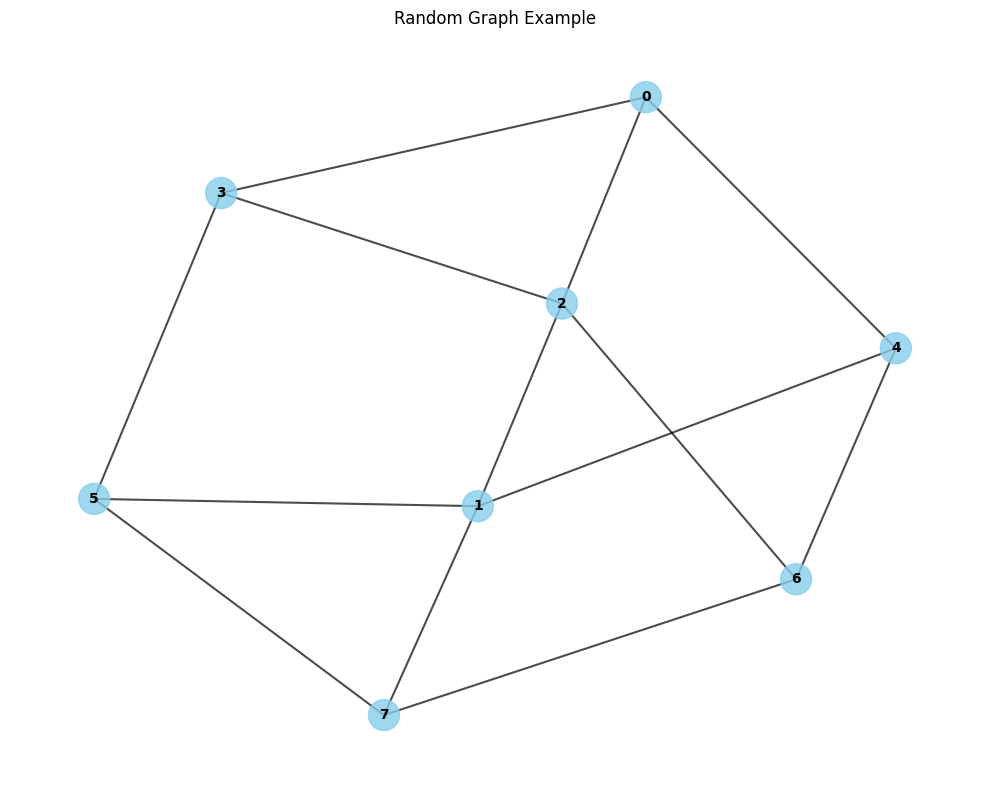

In [5]:
# Create a random graph with 8 nodes, feature dimension 3
random_graph = create_random_graph(num_nodes=8, edge_probability=0.3, feature_dim=3, seed=42)

# Print basic information about the graph
print(f"Number of nodes: {random_graph.get_nodes_count()}")
print(f"Number of edges: {random_graph.get_edges_count()}")
print("\nNode features:")
for node in random_graph.get_all_nodes()[:3]:  # Show only first 3 nodes for brevity
    print(f"Node {node}: {random_graph.get_node_features(node)}")

# Visualize the graph
visualize_graph(random_graph.graph, title="Random Graph Example")

## 6. Discussion Questions

1. How might you represent a social network as a graph for GNN processing? What would the nodes, edges, and features represent?

2. What advantages might GNNs have over CNNs when analyzing images with complex, non-grid relationships?

3. Consider a problem from your domain of interest. How could you formulate it as a graph problem suitable for GNNs?

4. Why is node ordering invariance important for graph neural networks? What would happen if a GNN model was sensitive to the order of nodes?

5. The paper by Scarselli et al. was published in 2009. How do you think GNN architectures have evolved since then? (You may research this question outside of this notebook)

## 7. Next Steps

In the next notebook, we'll dive deeper into the mathematical foundations of GNNs, including:
- Formal notation for graphs
- Precise definition of state vectors
- Implementation of basic graph data structures needed for GNNs